In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


1


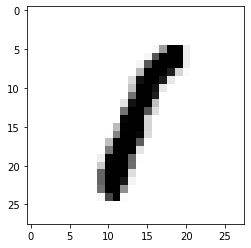

In [2]:

import matplotlib.pyplot as plt
image_index = 4569                            #a random number of training data set. training data set is fromm 0 to 60000
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys')# greys is to convert the image to grey scale

In [3]:

x_train.shape         #returns (dataset,width,height) 


(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)     #reshaping is done because in keras 4 dimensional data is accepted so we can not send 3 dimensional data
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [6]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')     #normalizing by dividing with 255 as float is needed
x_test = x_test.astype('float32')

In [7]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [8]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))#at first layer the shape is given to the filters after that it will detect the shape autometically by 28-3+1
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Flatten())                                                                # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [10]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1520 - accuracy: 0.9531
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0501 - accuracy: 0.9851
Epoch 3/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0366 - accuracy: 0.9885
Epoch 4/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0276 - accuracy: 0.9918
Epoch 5/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0234 - accuracy: 0.9929
Epoch 6/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0185 - accuracy: 0.9943
Epoch 7/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0161 - accuracy: 0.9946
Epoch 8/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0132 - accuracy: 0.9959
Epoch 9/10
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0124 - accuracy: 0.9959
Epoch 10/10
1875/1875 [==============================] - 52s 28m

In [11]:
model.evaluate(x_test, y_test)


313/313 [==============================] - 2s 8ms/step - loss: 0.0340 - accuracy: 0.9920


[0.03401149436831474, 0.9919999837875366]

6


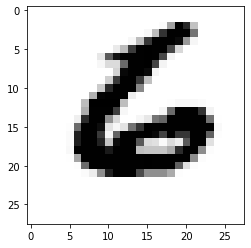

In [12]:
image_index = 9999
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28,28, 1))
print(pred.argmax())